In [1]:
#!pip install numpy
#!pip install gym
#!pip install matplotlib
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
pos_buckets = np.linspace(-1.2, 0.6, 20)
vel_buckets = np.linspace(-0.07, 0.07, 20)

In [3]:
def toDiscreteStates(obs):
    pos, vel = obs
    pos_disc = np.digitize(pos, pos_buckets)
    vel_disc = np.digitize(vel, vel_buckets)
    
    return(pos_disc, vel_disc)

In [4]:
def get_action(Q, obs, actions=[0,1,2]):
    if np.random.random() < eps:
        action = np.random.choice([0,1,2])
    else: 
        state = toDiscreteStates(obs)
        values = []
        for a in actions:
            values.append(Q[state, a])

        action = np.argmax(values)
    
    return action

In [5]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
n_games = 50000
alpha = 0.1
gamma = 0.99
eps = 1.0

In [6]:
states = []
for pos in range(21):
    for vel in range(21):
        states.append((pos,vel))

In [7]:
Q = {}
for state in states:
    for action in [0,1,2]:
        Q[state, action] = 0

In [8]:
def updateQ_SARSA(obs, action, reward, new_obs, new_action):
    state = toDiscreteStates(obs)
    new_state = toDiscreteStates(new_obs)
    Q[state, action] = Q[state, action] + alpha*(reward + gamma*Q[new_state, new_action] - Q[state, action])

In [9]:
score = 0
total_rewards = np.zeros(n_games)

for i in range(n_games):
    done = False
    obs = env.reset()
    if i % 100 == 0 and i>0:
        print('episode ', i, 'score ', score, 'eps ', eps)
    score = 0
    while not done:      
        action = get_action(Q, obs)
        new_obs, reward, done, info = env.step(action)
        score += reward
        new_action = get_action(Q, new_obs)
        updateQ_SARSA(obs, action, reward, new_obs, new_action)
        obs = new_obs
    total_rewards[i] = score
    if eps > 0.01:
        eps = eps - 2/n_games
    else:
        eps = 0.01

episode  100 score  -1000.0 eps  0.9600000000000044
episode  200 score  -1000.0 eps  0.9200000000000088
episode  300 score  -838.0 eps  0.8800000000000132
episode  400 score  -912.0 eps  0.8400000000000176
episode  500 score  -970.0 eps  0.800000000000022
episode  600 score  -621.0 eps  0.7600000000000264
episode  700 score  -1000.0 eps  0.7200000000000308
episode  800 score  -757.0 eps  0.6800000000000352
episode  900 score  -455.0 eps  0.6400000000000396
episode  1000 score  -446.0 eps  0.600000000000044
episode  1100 score  -324.0 eps  0.5600000000000485
episode  1200 score  -515.0 eps  0.5200000000000529
episode  1300 score  -274.0 eps  0.4800000000000545
episode  1400 score  -206.0 eps  0.44000000000005335
episode  1500 score  -264.0 eps  0.4000000000000522
episode  1600 score  -240.0 eps  0.36000000000005106
episode  1700 score  -148.0 eps  0.3200000000000499
episode  1800 score  -242.0 eps  0.28000000000004877
episode  1900 score  -223.0 eps  0.24000000000004762
episode  2000 sc

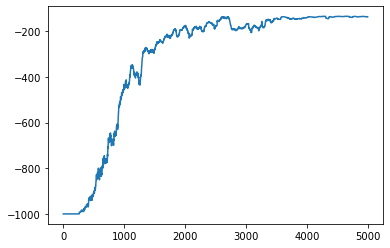

In [10]:
mean_rewards = np.zeros(n_games)
for r in range(n_games):
    mean_rewards[r] = np.mean(total_rewards[max(0, r-50):(r+1)])
plt.plot(mean_rewards)
plt.savefig('mountaincar.png')

In [ ]:
def